# Credit Card Customer Analysis

In [ ]:
# Importing the improtant library
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from platform import python_version
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load the CSV file BankChurners
df = pd.read_csv('/content/BankChurners.csv')

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
# see all features
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [ ]:
#Drop unneccessary columns
df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
                      , 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','CLIENTNUM'], inplace = True)

In [ ]:
df.shape

(10127, 20)

In [ ]:
# check number of null values present in each features
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

#Here we can oberve that the there is no any missing value

In [ ]:
# general information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [ ]:
#Finding the duplicates from dataset.
df[df.duplicated()]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


no duplicate rows in our dataset

# Checking for the outliers

In [ ]:
num_cols=df.select_dtypes(['float64','int64'])
num_cols.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


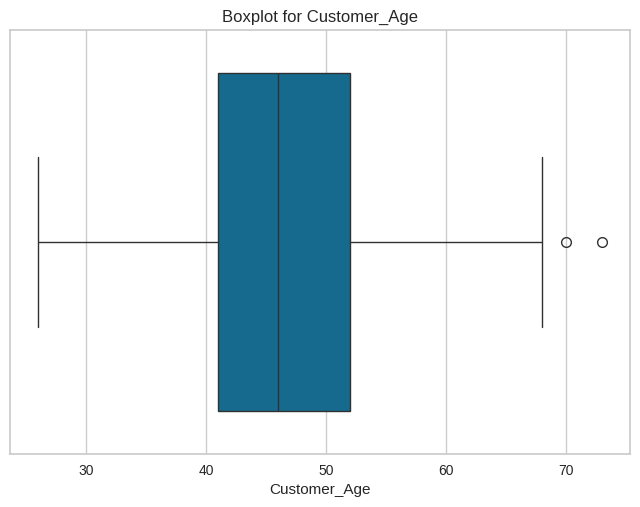

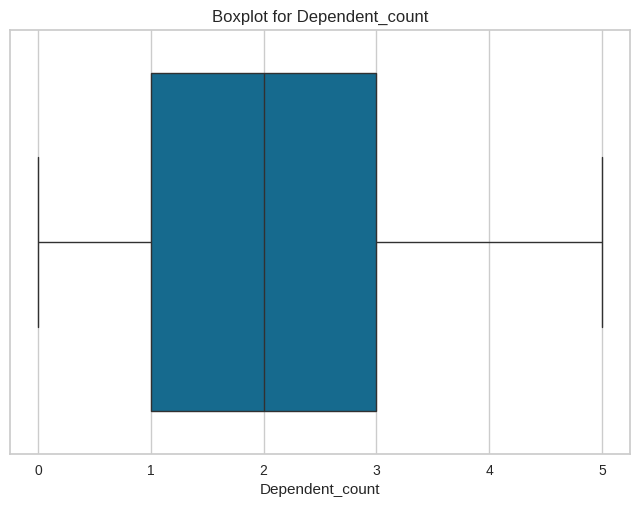

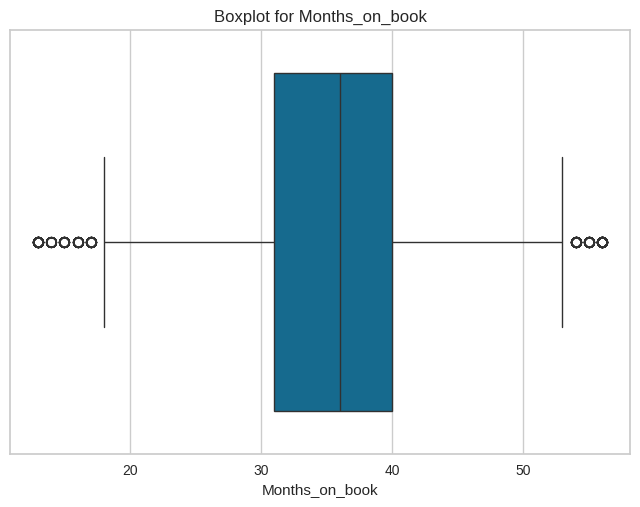

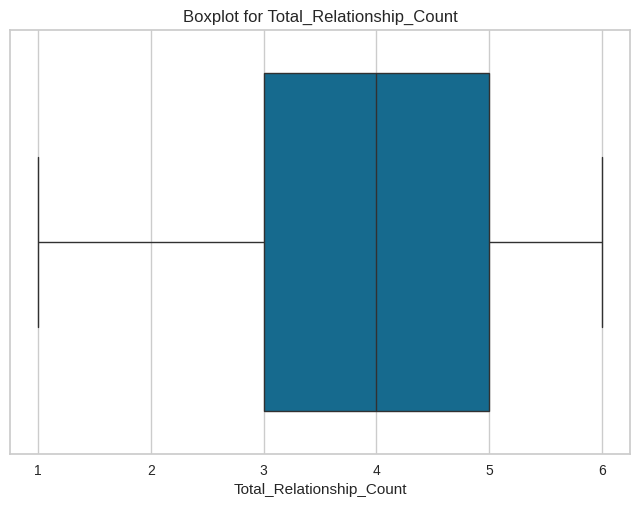

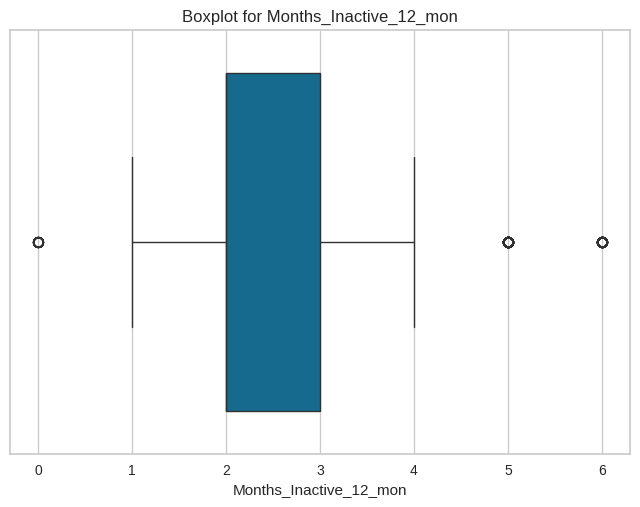

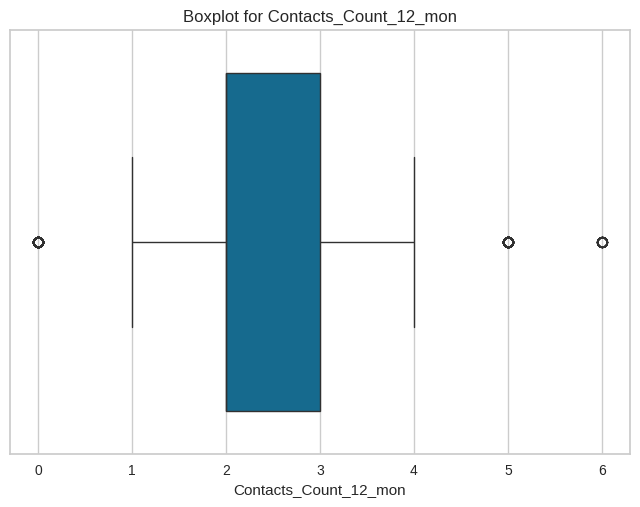

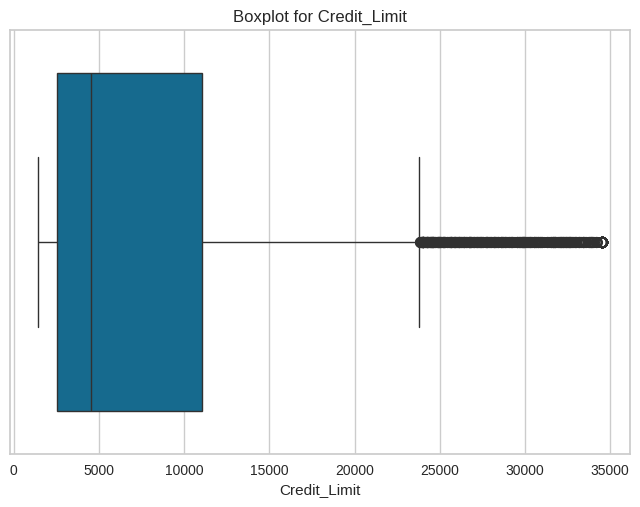

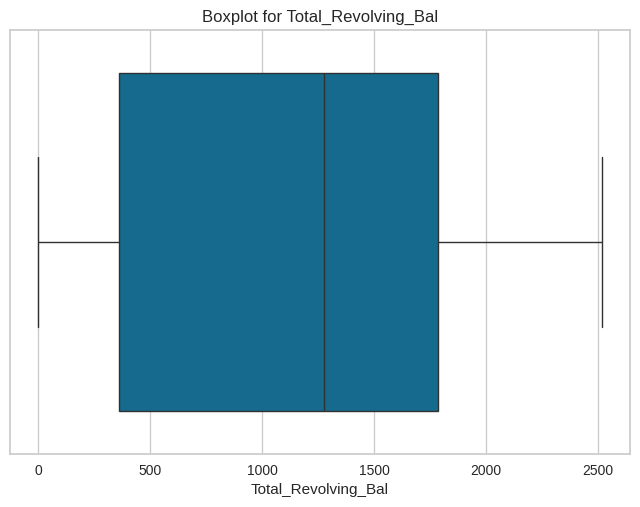

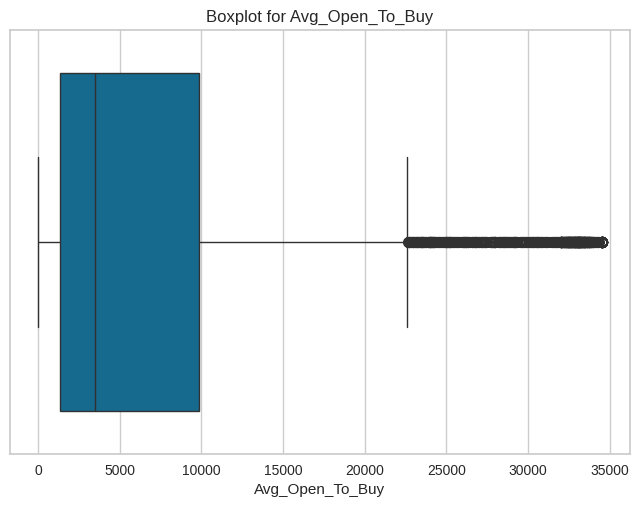

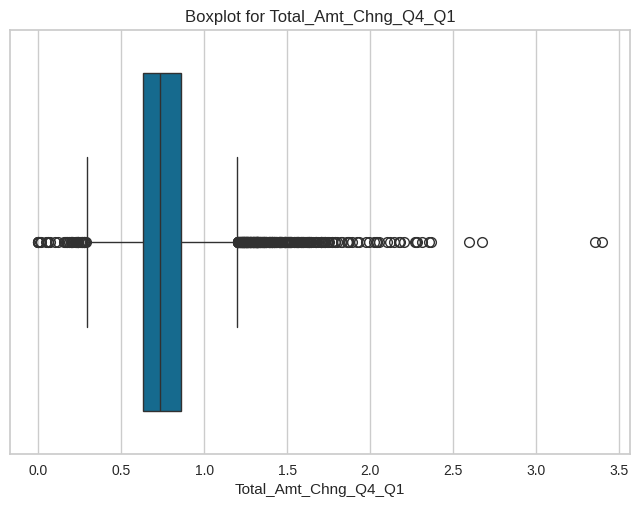

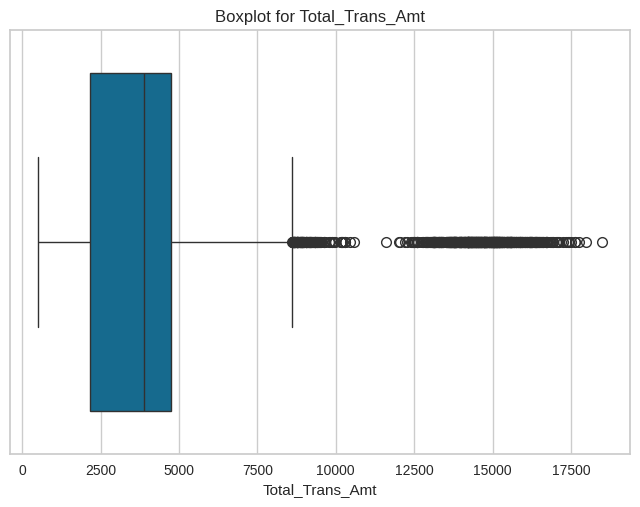

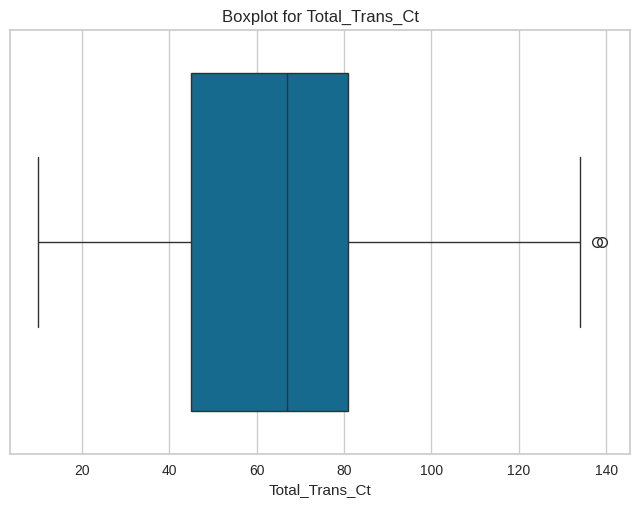

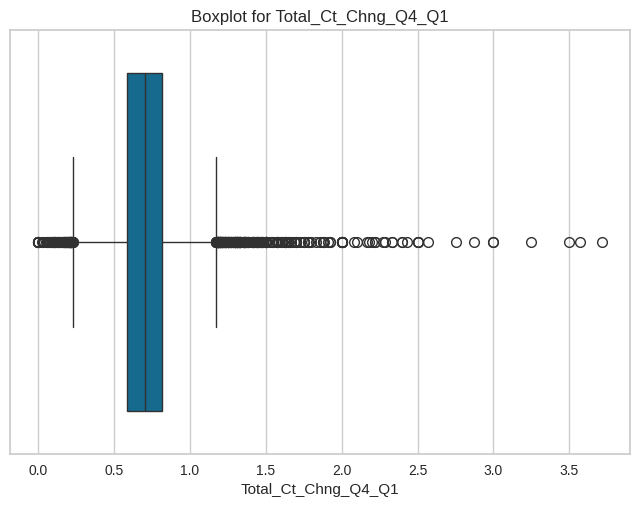

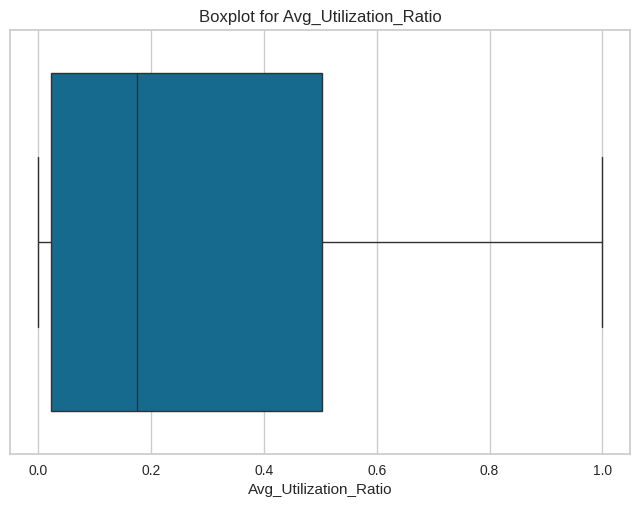

In [ ]:
 import seaborn as sns
import matplotlib.pyplot as plt

# Iterate through each column in the dataframe
for col in num_cols:
    # Create a boxplot for the current column
    sns.boxplot(x=num_cols[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


 With the help of Boxplot we  are able to see outliers and skewedness but we won’t be removing as they are making up big Chunk in our dataset.

**No irregularities or anomalies were found in the data, indicating that the dataset appears to be clean and free from unexpected or erroneous values.**



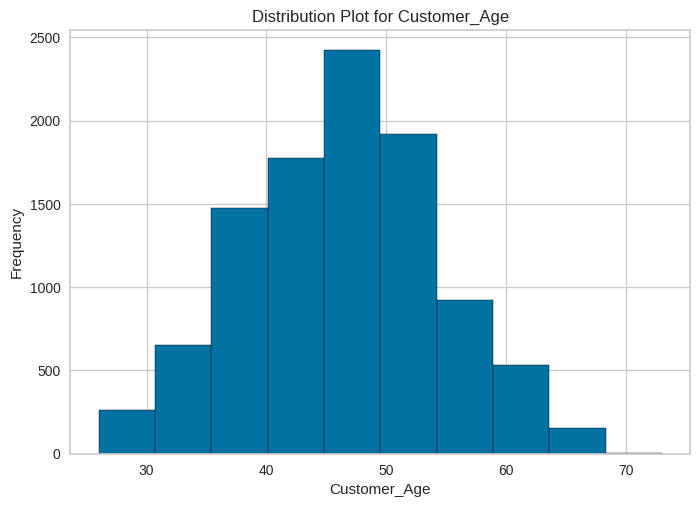

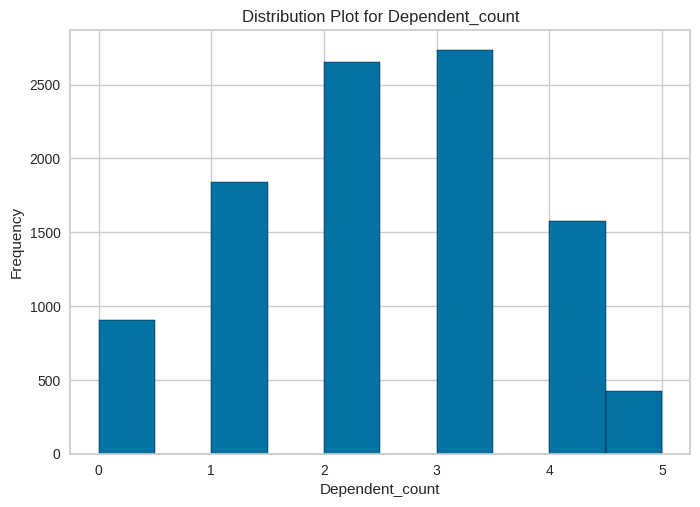

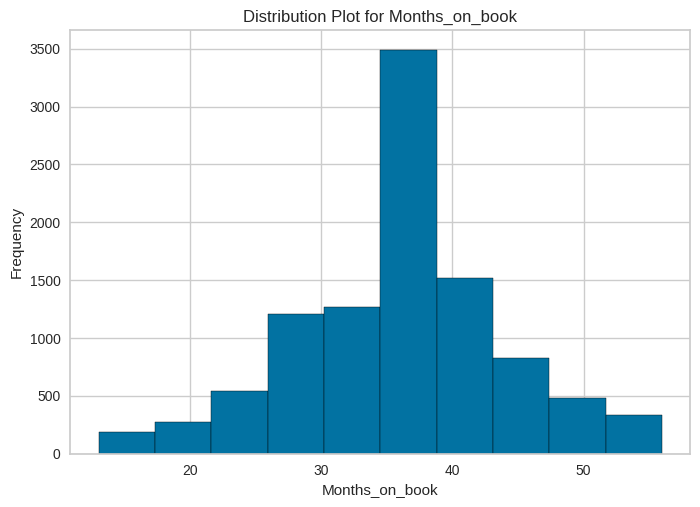

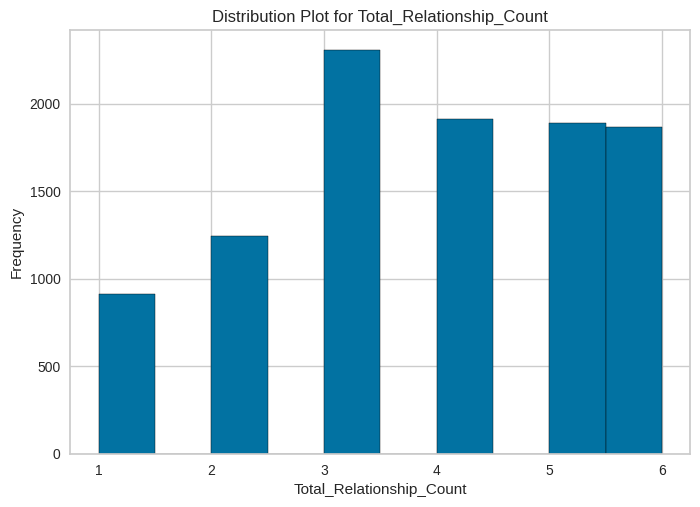

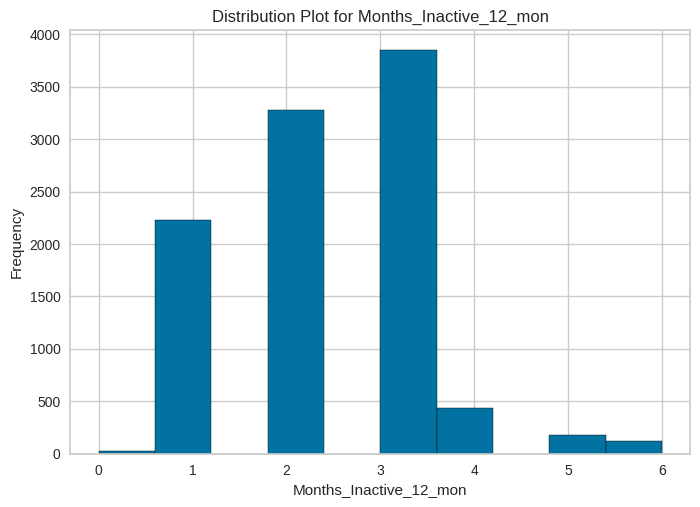

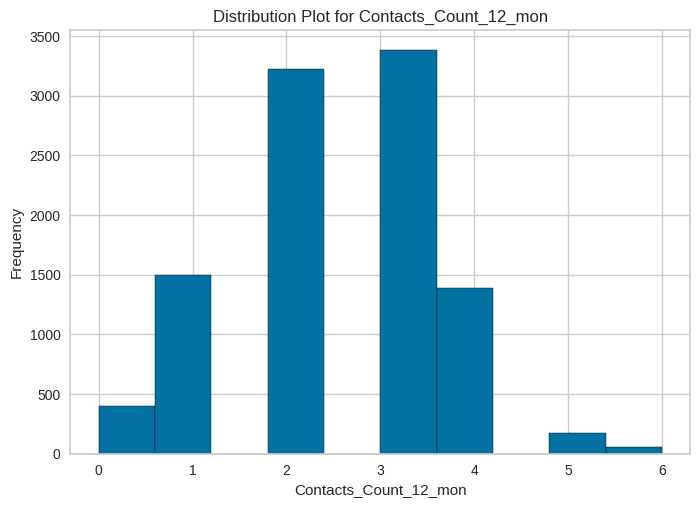

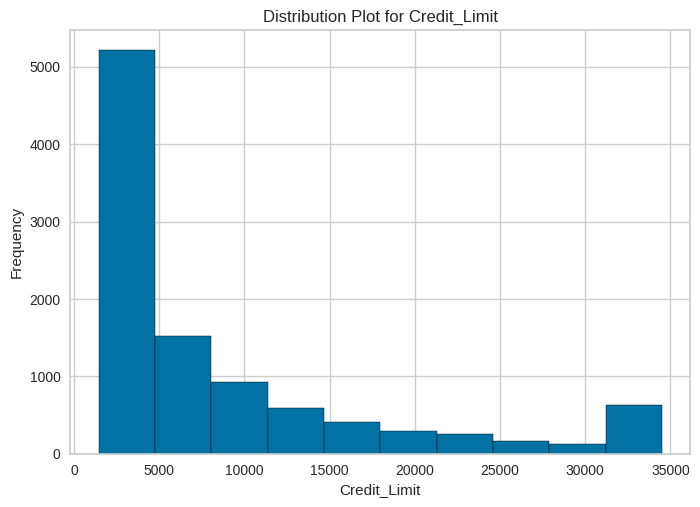

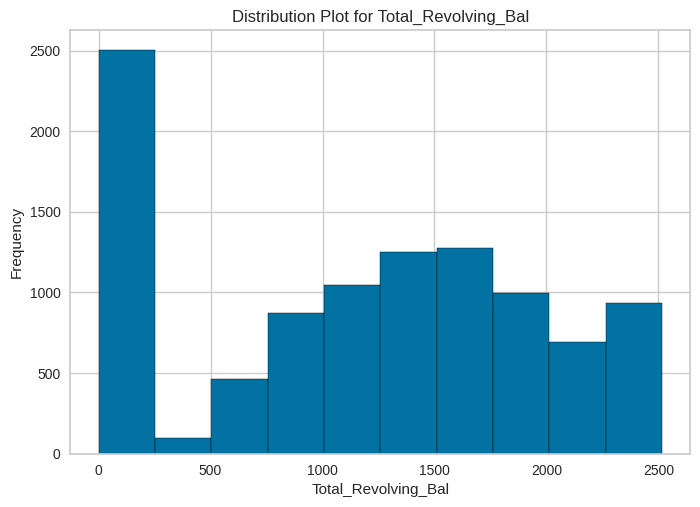

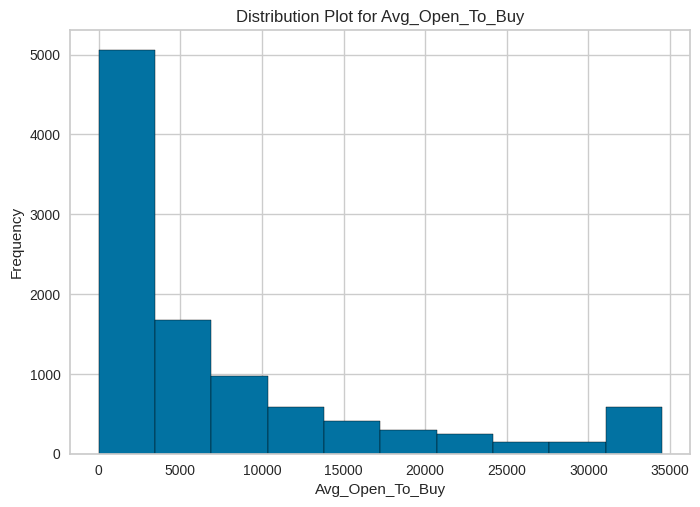

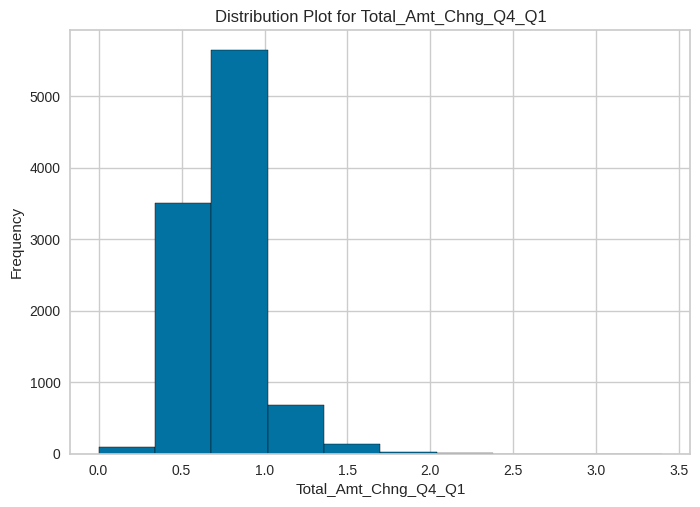

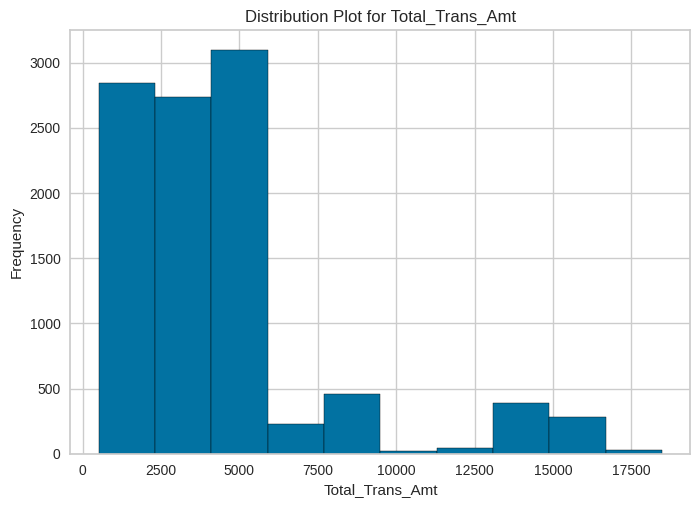

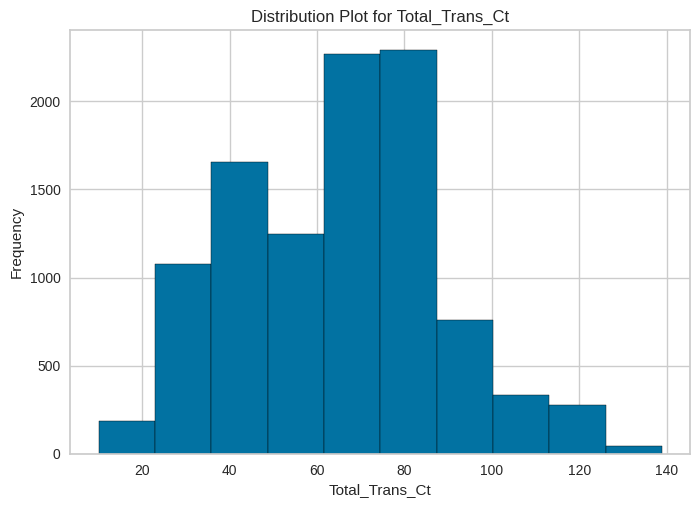

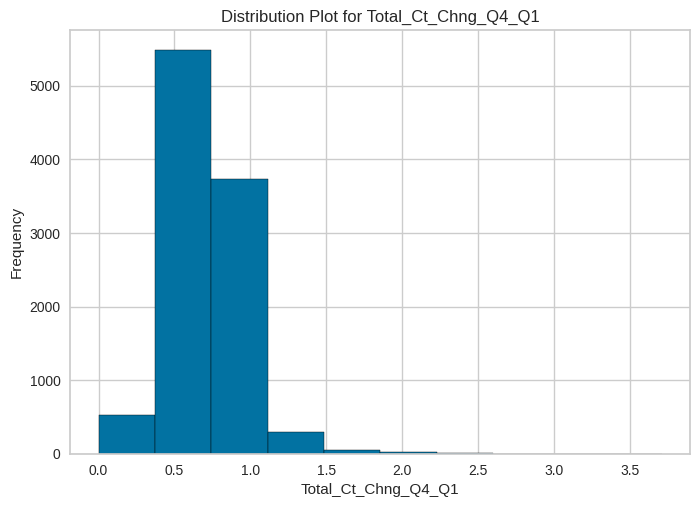

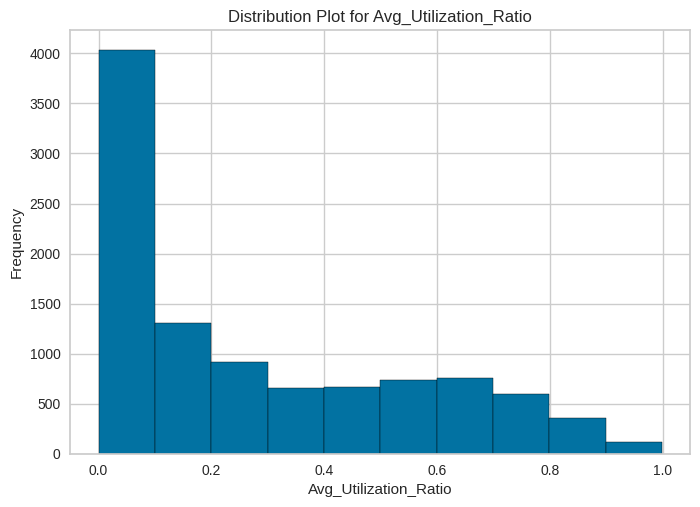

In [ ]:
# prompt: plot the distribution plot for num_cols

for col in num_cols:
    plt.hist(df[col], bins=10, edgecolor='black')
    plt.title(f'Distribution Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


# Checking shape


In [ ]:
df.shape

(10127, 20)

In [ ]:
# Finding the Basic Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


**Age-**

The average age of our customers is approximately 46 years, suggesting a mature customer base. Understanding age demographics can help tailor products and services to different age groups' preferences and financial needs.<br>

**Total_Relationship_Count-**

 On average, customers hold around 3.81 banking products, indicating a strong relationship with our bank. Focusing on increasing this count can lead to deeper customer engagement and loyalty.<br>

**Credit_Limit**-

The average credit limit extended to customers is approximately $8,632, reflecting their creditworthiness. Managing credit limits effectively can influence customer spending behavior and overall financial health <br>

**Total_Trans_Amt**-

Customers transacted an average of approximately $4,404, indicating their spending habits. Analyzing transaction amounts can help identify trends and opportunities for targeted marketing or product promotions.<br>

**Total Transaction Count (Total_Trans_Ct):**

Interpretation: On average, customers made around 65 transactions, highlighting their level of engagement with our bank's services. Monitoring transaction counts can provide insights into customer activity and satisfaction.<br>

**Average Utilization Ratio (Avg_Utilization_Ratio):**

Interpretation: The average utilization ratio is approximately 0.27, indicating how much of their available credit customers typically use. Managing utilization ratios effectively can impact credit risk and customer satisfaction.

**Dependent_count**

On average, customers have around 2.35 dependents, with some individuals reporting no dependents while others have up to 5.

**Months_on_book**

Customers have been associated with our bank for an average of approximately 36 months, with a range from 13 to 56 months. This indicates the varying lengths of relationships our customers have with us.



# **Statistical test**

Now let’s see how each features affect one another in our dataset.

In [ ]:
# To analyze the categorical feature we will use chi-square test

df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# **Chi squared test of independence**

In [ ]:
# We will try to see is there is any relation sheep between Age and attrition flag

In [ ]:
#Import the library
from scipy.stats import chi2_contingency

# checking the dtype

print(df['Gender'].dtype)
print(df['Attrition_Flag'].dtype)

object
object


In [ ]:
# need to chane the Income category dtype into category
df['Gender'] = df['Gender'].astype('category')
df['Attrition_Flag'] = df['Attrition_Flag'].astype('category')

In [ ]:
contingency_table = pd.crosstab(df['Gender'], df['Attrition_Flag'])

# Hypothesis

H0:- Gender and attrition flag are independent<br>

vs

H1:- Gender and attrition flag are Dependent

In [ ]:

stat, p, dof, expected = chi2_contingency(contingency_table)

print(p)

0.00019635846717310307


In [ ]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Gender and attrition flag are Dependent (reject H0)')
else:
    print('Gender and attrition flag are Independent (H0 holds true)')

p value is 0.00019635846717310307
Gender and attrition flag are Dependent (reject H0)


# 2 **Hypothesis**
H0:- Attrition_Flag and Income Category are independent

vs

H1:- Attrition_Flag and Income Category are Dependent

In [ ]:
contingency_table = pd.crosstab(df['Income_Category'], df['Attrition_Flag'])

stat, p, dof, expected = chi2_contingency(contingency_table)


In [ ]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Income Category and attrition flag are Dependent (reject H0)')
else:
    print('Income Categoryr and attrition flag are Independent (H0 holds true)')

p value is 0.025002425704390617
Income Category and attrition flag are Dependent (reject H0)


### 3  **Hypothesis**
H0:- Attrition_Flag and Income Category are independent

vs

H1:- Attrition_Flag and ncome Category are Dependent

In [ ]:
contingency_table = pd.crosstab(df['Education_Level'], df['Attrition_Flag'])

stat, p, dof, expected = chi2_contingency(contingency_table)

In [ ]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Education Level and attrition flag are Dependent (reject H0)')
else:
    print('Education Level and attrition flag are Independent (H0 holds true)')

p value is 0.05148913147336634
Education Level and attrition flag are Independent (H0 holds true)


In [ ]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

# 4 **Hypothesis**
H0:- Attrition_Flag and Marital_Status are independent

vs

H1:- Attrition_Flag and Marital_Status are Dependent

In [ ]:
contingency_table = pd.crosstab(df['Marital_Status'], df['Attrition_Flag'])

stat, p, dof, expected = chi2_contingency(contingency_table)

In [ ]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Marital_Status and attrition flag are Dependent (reject H0)')
else:
    print('Marital_Status and attrition flag are Independent (H0 holds true)')

p value is 0.10891263394840227
Marital_Status and attrition flag are Independent (H0 holds true)


# **5 Hypothesis**
H0:- Attrition_Flag and Card_Category are independent

vs

H1:- Attrition_Flag and Card_Category are Dependent

In [ ]:
contingency_table = pd.crosstab(df['Card_Category'], df['Attrition_Flag'])

stat, p, dof, expected = chi2_contingency(contingency_table)

In [ ]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Card_Category and attrition flag are Dependent (reject H0)')
else:
    print('Card_Category and attrition flag are Independent (H0 holds true)')

p value is 0.5252382797994759
Card_Category and attrition flag are Independent (H0 holds true)


# **Statistical Correlation Analysis for continuos variables**

In [ ]:
num_cols

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [ ]:
#Find the Correlation  for the variable num_cols

import pandas as pd

# Get the numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
corr_matrix = df[num_cols].corr()
corr_matrix.T

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Customer_Age,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808
Total_Amt_Chng_Q4_Q1,-0.062042,-0.035439,-0.048959,0.050119,-0.032247,-0.024445,0.012813,0.058174,0.007595,1.000000,0.039678,0.005469,0.384189,0.035235


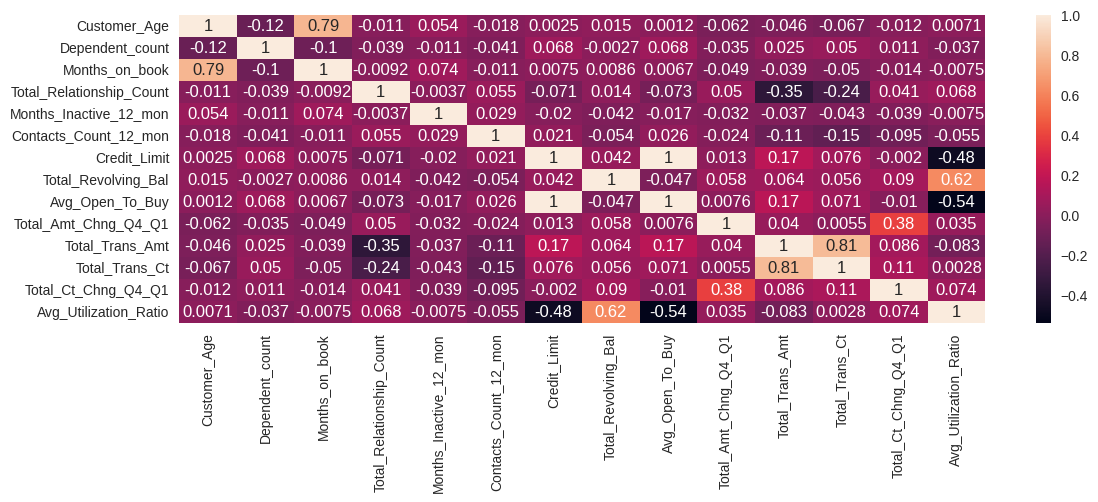

In [ ]:
# Heat map with value for the variable num_cols

plt.figure(figsize=(13, 4))
sns.heatmap(corr_matrix, annot=True)
plt.show()


**Some Important insight information that I got from the correlation matrix is**

1-There is a moderate positive correlation between "Customer_Age" and "Months_on_book" (0.79), indicating that older customers tend to have longer relationships with the bank.

2- "Total_Revolving_Bal" and "Avg_Utilization_Ratio" have a relatively strong positive correlation of 0.62, suggesting that as the revolving balance increases, so does the utilization ratio.

3- There is a weak negative correlation between "Total_Ct_Chng_Q4_Q1" and "Months_on_book" (-0.01), implying that changes in the total number of transactions tend to decrease with longer customer relationships.

4- "Avg_Open_To_Buy" and "Credit_Limit" have a strong positive correlation of 1.0, indicating that they are highly correlated and possibly representing redundant information.

5- "Total_Trans_Amt" and "Total_Trans_Ct" exhibit a strong positive correlation of 0.81, suggesting that as the transaction amount increases, so does the total transaction count.

# **Data Analysis and Visualization**

 **1.Distribution plot of Customer_Age**

<Axes: xlabel='Customer_Age', ylabel='Density'>

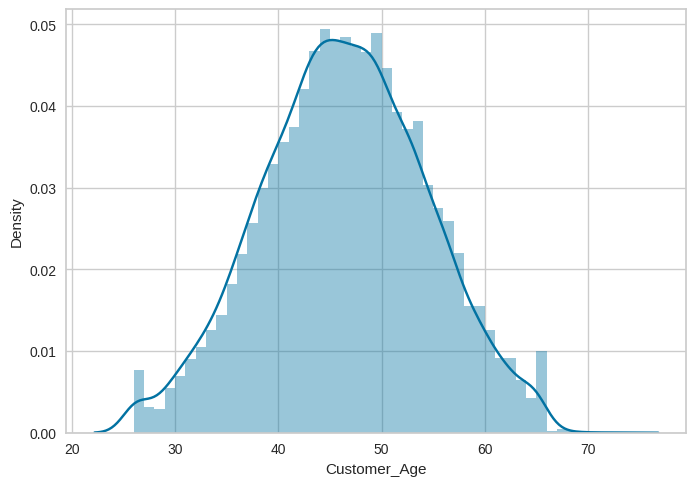

In [ ]:
# finding the distribution of the Data
sns.distplot(df['Customer_Age'])

**2.Distribution plot of Dependent_Count**

<Axes: xlabel='Dependent_count', ylabel='Density'>

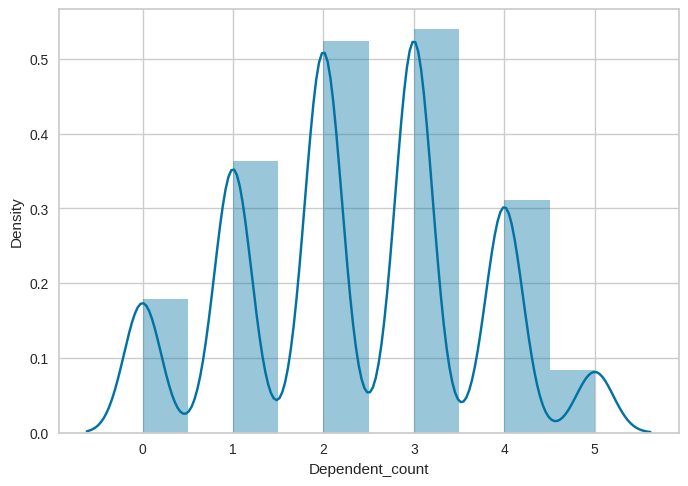

In [ ]:
sns.distplot(df['Dependent_count'],bins=10)

In [ ]:
# Checking the skewness
from scipy.stats import skew
print(skew(df['Dependent_count']))

-0.02082245083419453


**3.Distribution plot of Credit Limit**

<Axes: xlabel='Credit_Limit', ylabel='Density'>

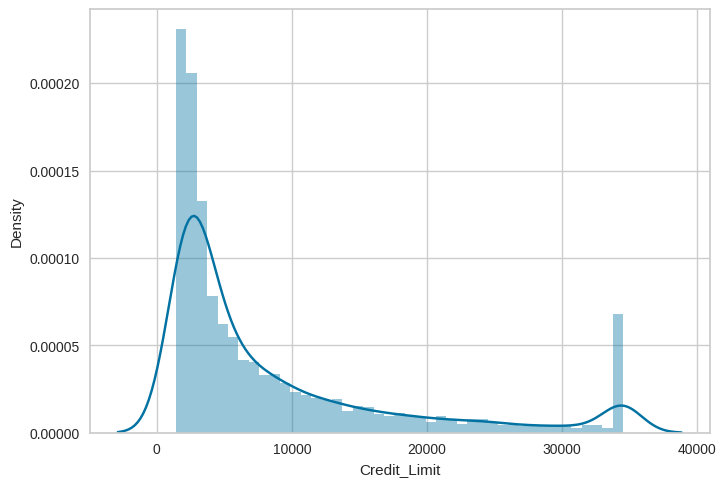

In [ ]:
sns.distplot(df['Credit_Limit'])


As depicted in the figure above, the distribution of credit limits is left-skewed. <br> The majority of customers have lower credit limits, typically ranging between 5,000 to 10,000

**4.Distribution plot of Total_Trans_Amt**

<Axes: xlabel='Total_Trans_Amt', ylabel='Density'>

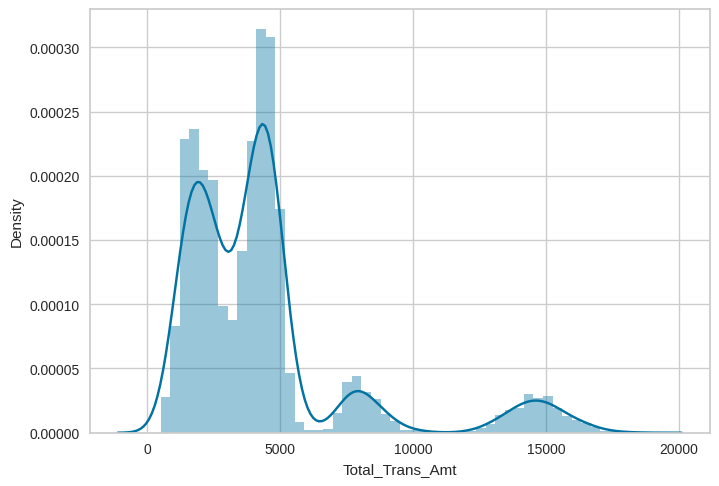

In [ ]:
sns.distplot(df['Total_Trans_Amt'])

In [ ]:
print(skew(df['Total_Trans_Amt']))

2.0407010789778317


The transaction volume chart also exhibits a positive-skewed distribution. <br> The majority of transactions fall within the range of 2,000 to 5,000.

**5.Distribution plot of  Total_Trans_Count**

<Axes: xlabel='Total_Trans_Ct', ylabel='Density'>

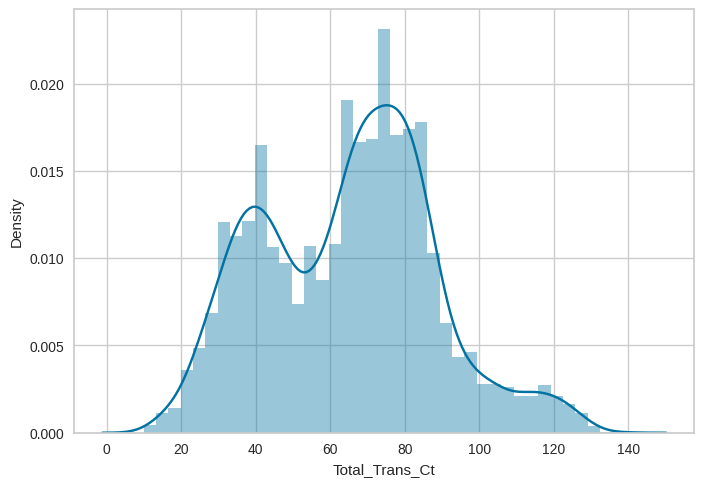

In [ ]:
sns.distplot(df['Total_Trans_Ct'])

A significant portion of customers conduct around 80 transactions, indicating a peak in the distribution.  <br> The shape of the distribution appears to be approximately normal

In [ ]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

## **Finding the correlation between the variables**

<Axes: xlabel='Customer_Age', ylabel='Credit_Limit'>

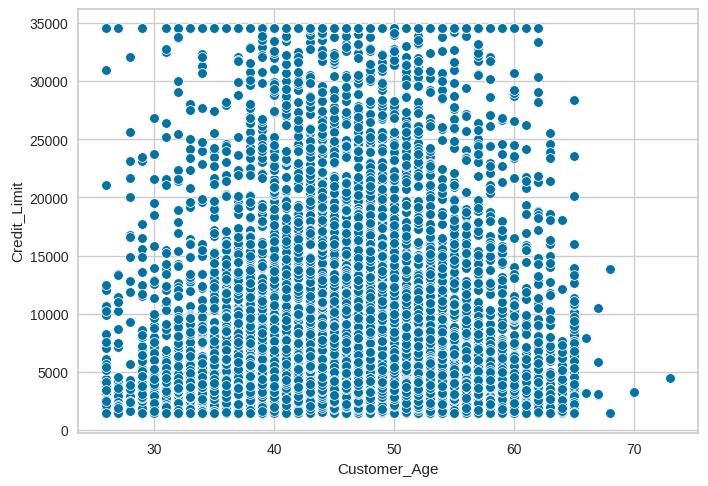

In [ ]:
sns.scatterplot(x=df['Customer_Age'],y=df['Credit_Limit'])

<Axes: xlabel='Total_Trans_Amt', ylabel='Total_Trans_Ct'>

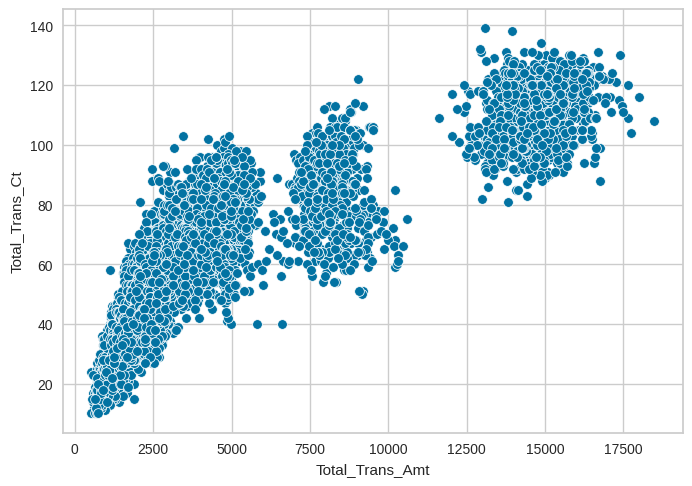

In [ ]:
sns.scatterplot(x=df['Total_Trans_Amt'], y=df['Total_Trans_Ct'])

From the figure provided, it's evident that there exists a positive correlation. <br>
This means that as the transaction count increases, the transaction amount also tends to increase.

### **1.Praportion of male and Female**

Text(0.5, 1.0, 'Number of Males vs Females')

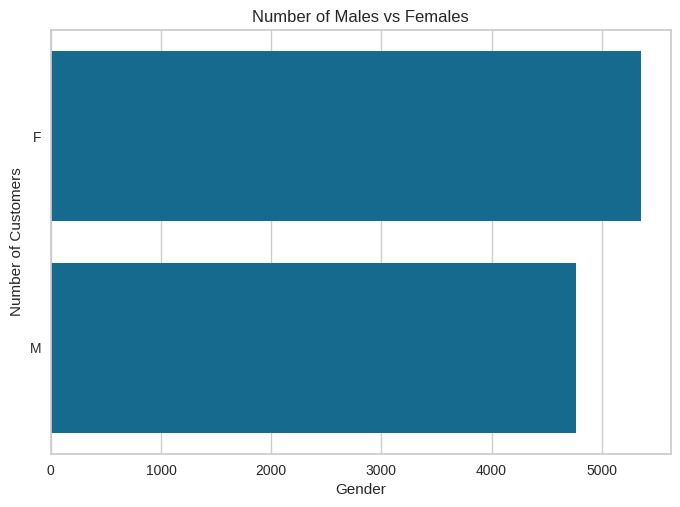

In [ ]:
sns.countplot(df['Gender'])
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Number of Males vs Females')

**2.Praportion of Attrition_Flag**

<Axes: xlabel='count', ylabel='Attrition_Flag'>

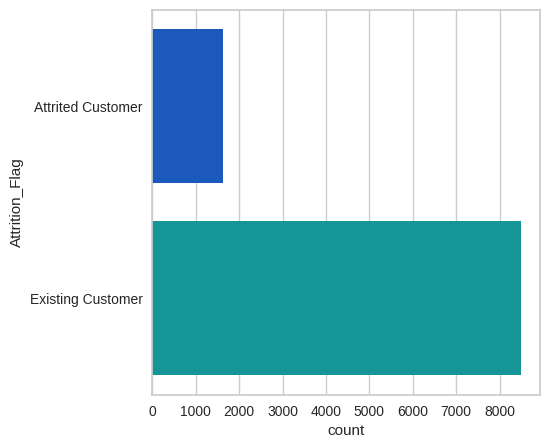

In [ ]:
plt.figure(figsize = (5,5))
sns.countplot(df['Attrition_Flag'],palette='winter')

Having such a ratio is not ideal. It indicates an imbalance in the dataset, which could lead to predictors generating false positives or negatives

**3.Praportion of Income Category**

<Axes: xlabel='count', ylabel='Income_Category'>

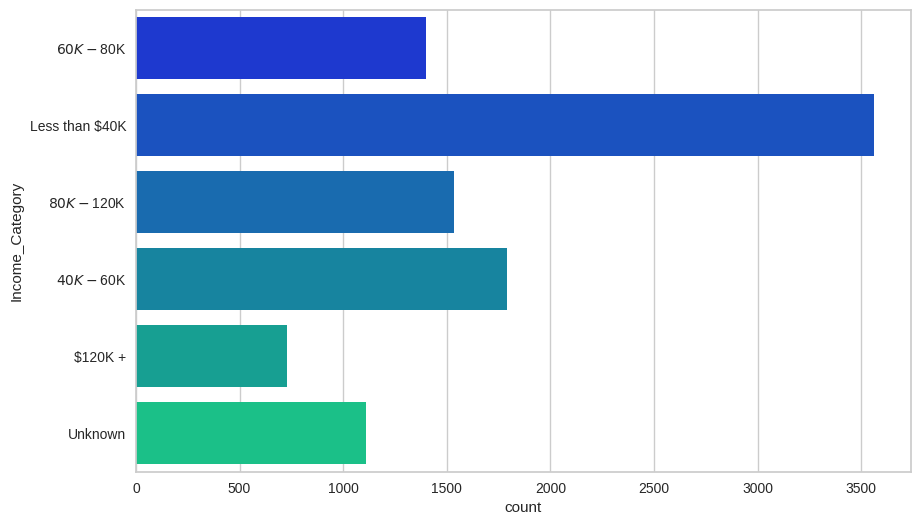

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(df['Income_Category'],palette='winter')

As depicted in the graph above, there are approximately 3,500 customers in our dataset belonging to the income category of less than $40,000

**4.Praportion of Card Category**

<Axes: xlabel='count', ylabel='Card_Category'>

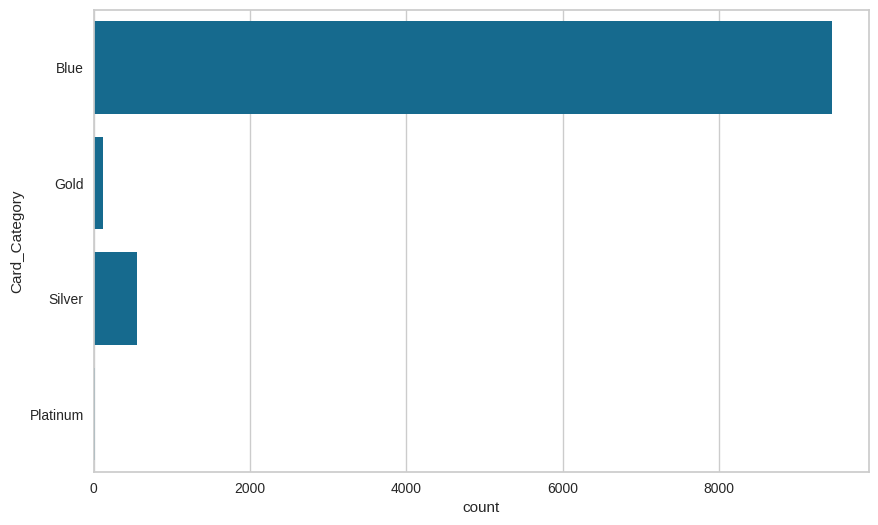

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(df['Card_Category'])

The majority of customers possess Blue cards (8000+), followed by Silver cards. Only a small number of customers hold Platinum cards

**1.Compairing Attrition_Flag with the Gender**

In [ ]:
df['Attrition_Flag'] = df['Attrition_Flag'].astype('category')
df['Gender'] = df['Gender'].astype('category')

<Axes: xlabel='Attrition_Flag', ylabel='count'>

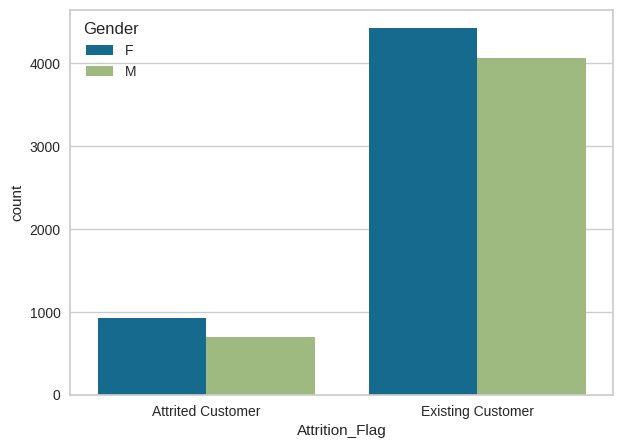

In [ ]:
plt.figure(figsize = (7,5))
sns.countplot(data = df, x = 'Attrition_Flag', hue = 'Gender')

Here, we observe that the number of female customers who have attrited is higher compared to male customers.

**2.Compairing Attrition_Flag with the Gender**





<Axes: xlabel='Attrition_Flag', ylabel='count'>

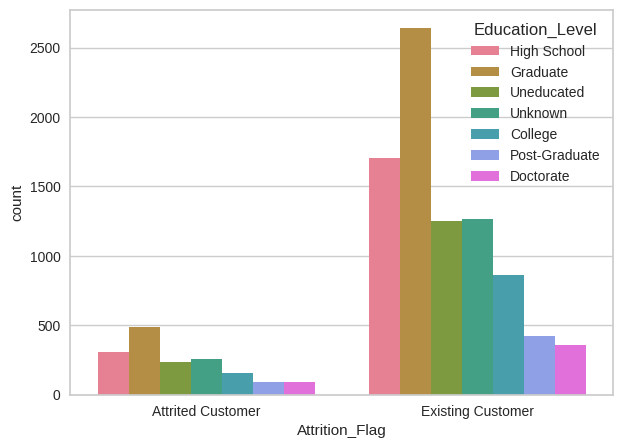

In [ ]:
plt.figure(figsize = (7,5))
sns.countplot(data = df, x = 'Attrition_Flag', hue = 'Education_Level')

As People are getting more educated, they are less likely to use credit card and their attrition count are also getting decreased

**3.Compairing Attrition_Flag with the Income Category**





<Axes: xlabel='Attrition_Flag', ylabel='count'>

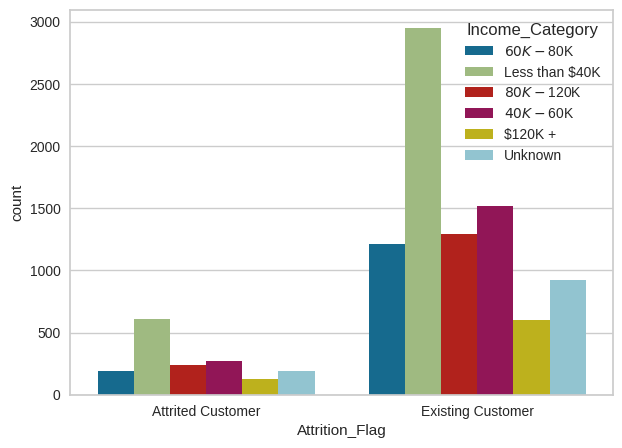

In [ ]:
plt.figure(figsize = (7,5))
sns.countplot(data = df, x = 'Attrition_Flag', hue = 'Income_Category')

Customers earning below $40,000 demonstrate a notably higher attrition rate.

**4.Compairing Attrition_Flag with the Card_Category**

<Axes: xlabel='Attrition_Flag', ylabel='count'>

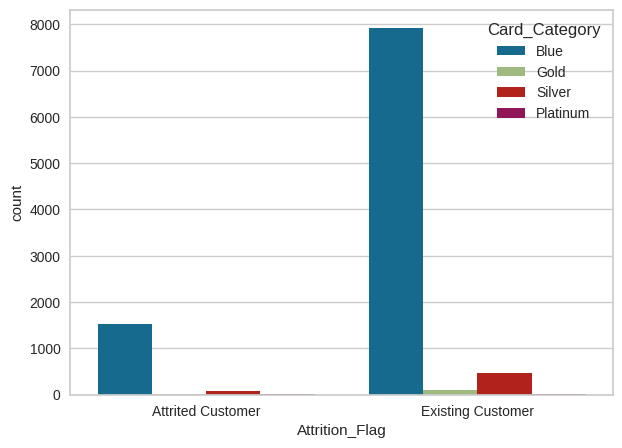

In [ ]:
plt.figure(figsize = (7,5))
sns.countplot(data = df, x = 'Attrition_Flag', hue = 'Card_Category')

People having Blue Credit are also having significantly higher attrition coun

**Is the attrition flag ( Target Feature ) balanced or imbalanced**

In [ ]:
#Is the attrition flag ( Target Feature ) balanced or imbalanced
churn = df['Attrition_Flag'].value_counts()

churn

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

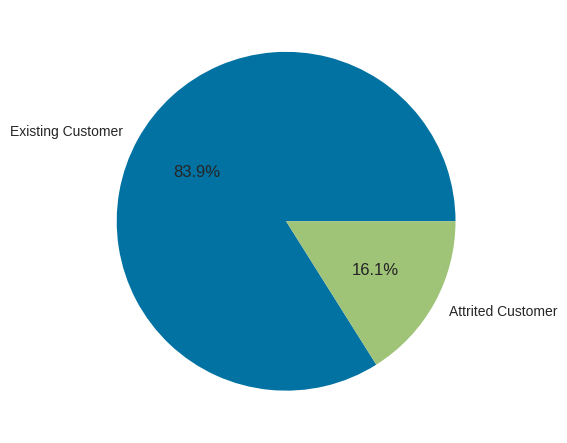

In [ ]:
piechart = plt.pie(x = churn, labels = churn.keys(),
                  autopct = "%.1f%%")

The proportion of gender count is almost equally distributed (52.9% male and 47.1%) compare to proportion of existing and attributed customer count (83.9% and 16.1%) which is highly imbalanced.

# **Handeling the Categorical features**

In [ ]:
df1['Gender'] = df1['Gender'].astype('object')
df1['Attrition_Flag'] = df1['Attrition_Flag'].astype('object')

In [ ]:
df1=df.copy()

In [ ]:
df1['Gender'] = df1['Gender'].astype('object')
df1['Attrition_Flag'] = df1['Attrition_Flag'].astype('object')

In [ ]:
df1.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
# Apply Label encoder for the categorical features

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df1.select_dtypes(include='object'):
    df1[col] = le.fit_transform(df1[col])


In [ ]:
df1.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int64  
 5   Marital_Status            10127 non-null  int64  
 6   Income_Category           10127 non-null  int64  
 7   Card_Category             10127 non-null  int64  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [ ]:
# Apply standardization

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the numerical data
scaler.fit(df1[num_cols])

# Transform the numerical data using the fitted scaler
df1[num_cols] = scaler.transform(df1[num_cols])

# Check the transformed data
df1.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,-0.165406,1,0.503368,3,1,2,0,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882
1,1,0.333570,0,2.043199,2,2,4,0,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276
2,1,0.583058,1,0.503368,2,1,3,0,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155
3,1,-0.789126,0,1.273283,3,3,4,0,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686
4,1,-0.789126,1,0.503368,5,1,2,0,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155


In [ ]:
df1.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,-0.165406,1,0.503368,3,1,2,0,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882
1,1,0.333570,0,2.043199,2,2,4,0,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276
2,1,0.583058,1,0.503368,2,1,3,0,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155
3,1,-0.789126,0,1.273283,3,3,4,0,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686
4,1,-0.789126,1,0.503368,5,1,2,0,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155


# **Part 3: Customer Segmentation**

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

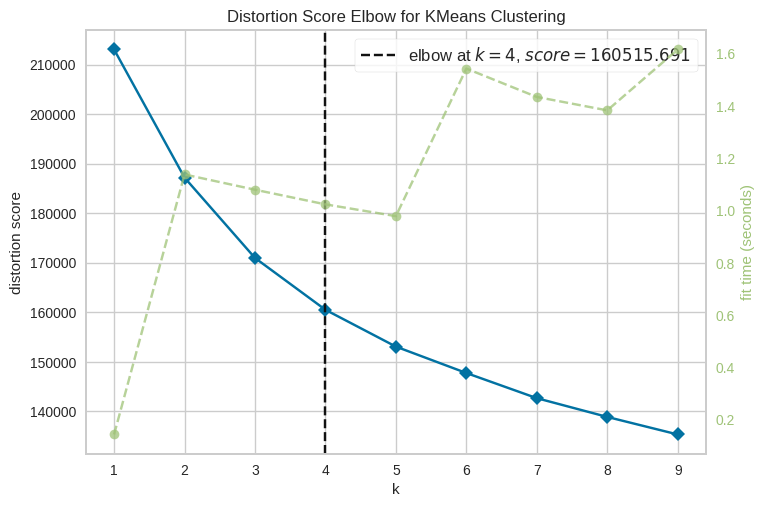

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# prompt: Determine how many cluster we should chose to run the k-means cluster

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 10))
visualizer.fit(df1)
visualizer.show()


# from the Elbow method we can chose k as 4 for now

In [ ]:
# Apply K-means clustering to the given data

# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Initialize KMeans with 5 clusters and random_state=0
km = KMeans(n_clusters=4, random_state=0)

# Fit the model to the scaled data
km.fit(df1)

# Add the cluster labels to the DataFrame
df1['cluster'] = km.labels_

# Print the cluster labels
print(df1['cluster'])


0        2
1        1
2        2
3        1
4        3
        ..
10122    2
10123    3
10124    1
10125    2
10126    1
Name: cluster, Length: 10127, dtype: int32


In [ ]:
km.cluster_centers_

array([[ 8.54197349e-01, -1.07052877e-03,  8.93225331e-01,
         1.64333272e-01,  3.12223859e+00,  1.52430044e+00,
         2.02577320e+00,  1.03240059e+00,  4.81514210e-03,
        -2.78799066e-01, -2.64544970e-02,  3.78042569e-03,
         2.11869578e+00,  2.08679345e-02,  2.11638011e+00,
        -2.16821263e-03,  5.96916058e-01,  3.77167160e-01,
        -2.98386598e-02, -8.32873900e-01],
       [ 8.32107843e-01,  2.92393787e-02,  1.48590686e-01,
        -6.88789478e-02,  1.90992647e+00,  1.46660539e+00,
         4.13204657e+00,  6.86274510e-02,  2.08188651e-02,
         7.36817990e-04,  2.62028523e-02, -1.80461109e-02,
        -4.46903340e-01,  2.31542094e-02, -4.48885303e-01,
        -4.80019937e-02, -3.51790105e-02,  5.00350674e-02,
        -1.84407444e-02,  2.80068836e-01],
       [ 8.47600768e-01, -3.16110655e-02,  7.33589251e-01,
         1.86613909e-02,  2.03493282e+00,  1.42687140e+00,
         1.47216891e+00,  1.34357006e-02, -1.15127247e-02,
         9.36590389e-02, -1.5

# **Part 4: Predictive Modeling**

In [ ]:
df.head ()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# **Categorical Encoding**

In [ ]:
# Ordinal Encoding
LE = LabelEncoder()
for cat in list(['Attrition_Flag', 'Education_Level', 'Income_Category', 'Card_Category']):
    df[cat] = LE.fit_transform(df[cat])

# Nominal Encoding
nominal_cats = ['Gender', 'Marital_Status']
for cat in nominal_cats:
    onehot = pd.get_dummies(df[cat], prefix = cat)
    df = df.join(onehot)

df = df.drop(['Gender', 'Marital_Status'], axis = 1)

In [ ]:
df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,1,45,3,3,2,0,39,5,1,3,...,1144,42,1.625,0.061,False,True,False,True,False,False
1,1,49,5,2,4,0,44,6,1,2,...,1291,33,3.714,0.105,True,False,False,False,True,False
2,1,51,3,2,3,0,36,4,1,0,...,1887,20,2.333,0.000,False,True,False,True,False,False
3,1,40,4,3,4,0,34,3,4,1,...,1171,20,2.333,0.760,True,False,False,False,False,True
4,1,40,3,5,2,0,21,5,1,0,...,816,28,2.500,0.000,False,True,False,True,False,False


# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df.drop(['Attrition_Flag'], axis = 1).astype(float).values
y = df['Attrition_Flag'].astype(float).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# **Imbalanced Dataset**

In [ ]:

smote = SMOTE(random_state = 0)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print('Before SMOTE')
print(pd.DataFrame(y_train).value_counts())
print('After SMOTE')
print(pd.DataFrame(y_resampled).value_counts())

Before SMOTE
1.0    6801
0.0    1300
Name: count, dtype: int64
After SMOTE
0.0    6801
1.0    6801
Name: count, dtype: int64


# **Modeling**

### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


# Train model
log_model = LogisticRegression().fit(X_resampled, y_resampled)

# Predict
log_y_test_pred = log_model.predict(X_test)

# Performance
print('Accuracy:', accuracy_score(y_test, log_y_test_pred))
print('Precision:', precision_score(y_test, log_y_test_pred, average = 'macro'))
print('Recall/Sensitivity:', recall_score(y_test, log_y_test_pred, average = 'macro'))

Accuracy: 0.7788746298124383
Precision: 0.671041180690026
Recall/Sensitivity: 0.7656725578816825


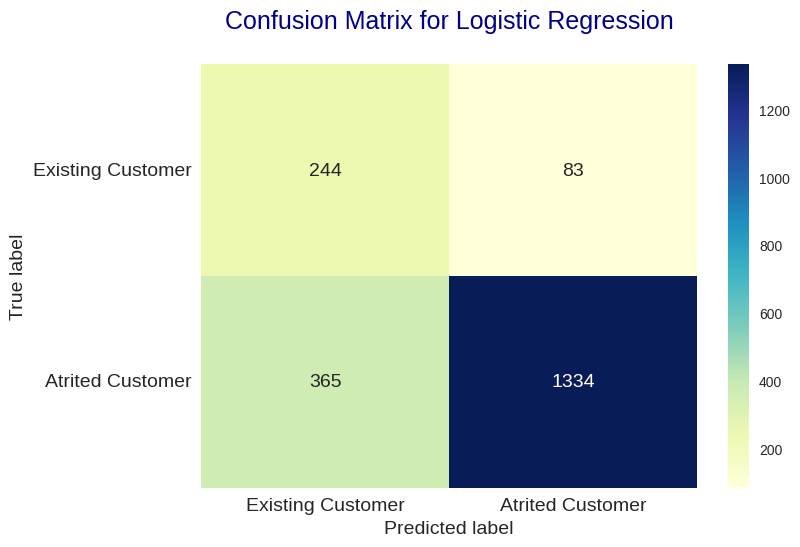

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, log_y_test_pred)),
                                   ('Existing Customer', 'Atrited Customer'),
                                   ('Existing Customer', 'Atrited Customer'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot = True, annot_kws = {'size' : 14}, fmt = 'd', cmap = 'YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 0, ha = 'center', fontsize = 14)

plt.title('Confusion Matrix for Logistic Regression\n', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label',fontsize = 14)
plt.show()

# **Random Forest Classifier**

In [ ]:
# Train model
rf_model = RandomForestClassifier(random_state = 42).fit(X_resampled, y_resampled)

# Predict
rf_y_test_pred = rf_model.predict(X_test)

# Performance
print('Accuracy:', accuracy_score(y_test, rf_y_test_pred))
print('Precision:', precision_score(y_test, rf_y_test_pred, average = 'macro'))
print('Recall/Sensitivity:', recall_score(y_test, rf_y_test_pred, average = 'macro'))

Accuracy: 0.9555774925962488
Precision: 0.9269990696052739
Recall/Sensitivity: 0.9056019640983273


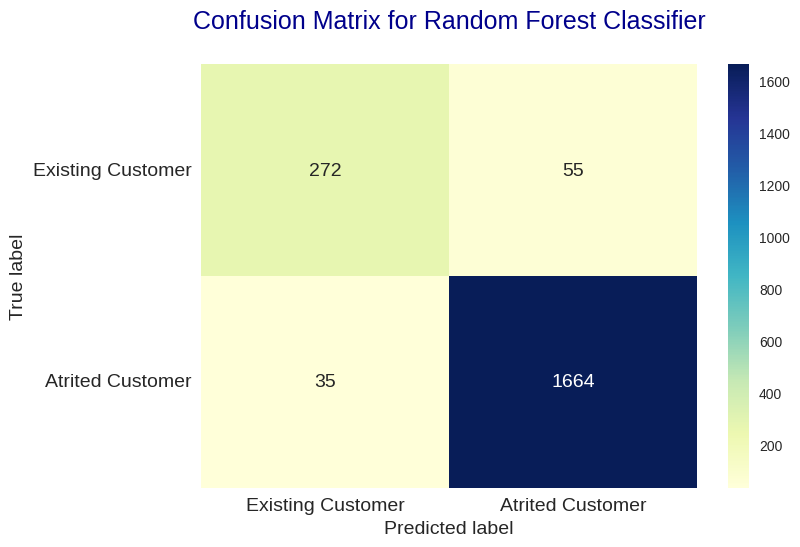

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, rf_y_test_pred)),
                                   ('Existing Customer', 'Atrited Customer'),
                                   ('Existing Customer', 'Atrited Customer'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot = True, annot_kws = {'size' : 14}, fmt = 'd', cmap = 'YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 0, ha = 'center', fontsize = 14)

plt.title('Confusion Matrix for Random Forest Classifier\n', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

# **Model Selection**

The Logistic Regression model, as much as 244 data with the status of Existing Customers have been correctly predicted as Existing Customers, and as much as 134 data with the status of Atrited Customers have been correctly predicted as Atrited Customers, but this model also makes prediction errors of 448 data. Based on these results, the performance of the model obtained is an Accuracy score of 77 %, a Precision score of 67 %, and a Recall score of 76% .


The Random Forest Classifier model, as much as 272 data with the status of Existing Customers have been correctly predicted as Existing Customers, and as much as 1664 data with the status of Atrited Customers have been correctly predicted as Atrited Customers, but this model also makes prediction errors of 90 data. Based on these results, the performance of the model obtained is an Accuracy score of 95.51%, a Precision score of 92%, and a Recall score of 90.

**Based on the performance of the two models, it can be concluded that the Random Forest model is the best performing model for this dataset case.**

# **Conclusion:**

To mitigate customer churn in the credit card business, the bank needs to address several key factors observed in the data analysis:

**Churn Rate:** Approximately 16.07% of customers have churned, indicating a notable portion of the customer base leaving the credit card services.

**Gender Distribution:** The gender distribution among customers is nearly equal, with 52.9% male and 47.1% female. However, there is a significant difference in churn rates between genders, with 14.4% more males churning compared to females.

**Education Level:** A large proportion of churned customers have attained a Graduate-level education (29.9%), followed by Post-Graduate level (18.8%). This suggests that highly educated individuals are more likely to churn.

**Marital Status:** The majority of churned customers are Married (43.6%) or Single (41.1%). This contrasts with a higher proportion of existing customers who are Married or Single, indicating a potential correlation between marital status and churn.

**Income Category:** As you can see from the proportion of income category of attrited customer, it is highly concentrated around 60K - 80K income (37.6%), followed by Less than 40K income (16.7%) compare to attrited customers with higher annual income of 80K-120K(14.9%) and over 120K+ (11.5%). I assume that customers with higher income doesn't likely leave their credit card services than meddle-income customers



**Addressing these insights, the bank can tailor retention strategies, such as personalized offers, targeted communication, and improved customer service, to retain customers and reduce churn rates effectively.**